<a href="https://colab.research.google.com/github/DariNGplus/cd_202202_hernando_duran/blob/main/TallerKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install pyproj
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

route = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(route)

In [3]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
print(df['conducta'].unique())

['1. Ambulatorio' '2. Hospitalizacion piso' '4. Observacion' '3. UCI']


In [5]:
dfSexo = []
dfEdad = []
dfSalud = []
dfConducta = []


for i in range(0, df.shape[0]):
  if df['sexo_'].iloc[i] == 'M':
    dfSexo.append(0)
  else:
    dfSexo.append(1)

  if df['uni_med_'].iloc[i] == 2:
    dfEdad.append(float(df['edad_'].iloc[i]/12))
  elif df['uni_med_'].iloc[i] == 3:
    dfEdad.append(float(df['edad_'].iloc[i]/365))
  else:
    dfEdad.append(float(df['edad_'].iloc[i]))

  if df['tip_ss_'].iloc[i] == 'Contributivo':
    dfSalud.append(0)
  elif df['tip_ss_'].iloc[i] == 'Especial':
    dfSalud.append(1)
  elif df['tip_ss_'].iloc[i] == 'Subsidiado':
    dfSalud.append(2)
  elif df['tip_ss_'].iloc[i] == 'Particular':
    dfSalud.append(3)
  else:
    dfSalud.append(4)
  
  if df['conducta'].iloc[i] == '1. Ambulatorio':
    dfConducta.append(0)
  elif df['conducta'].iloc[i] == '2. Hospitalizacion piso':
    dfConducta.append(1)
  elif df['conducta'].iloc[i] == '3. UCI':
    dfConducta.append(2)
  else:
    dfConducta.append(3)

df['sexo_norm'] = dfSexo
df['edad_norm'] = dfEdad
df['salud_norm'] = dfSalud
df['conducta_norm'] = dfConducta


In [14]:
df = df.drop(columns=['ID', 'fec_not', 'año', 'sexo_', 'uni_med_', 'cod_pais_o', 'cod_dpto_o', 'cod_mun_o', 'tip_ss_', 'cod_ase_', 'fecha_contagio', 'inicio_sintomas', 'fec_hos_', 'condicion_final', 'fecha_defuncion','fecha_nacimiento', 'certif_defuncion', 'conducta', 'latitud', 'longitud'])

In [15]:
df.dtypes

semana                 int64
edad_                  int64
area_                  int64
ocupacion_             int64
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
pac_hos_               int64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias               int64
artralgia              int64
erupcion               int64
dolor_abdomen          int64
vomito                 int64
diarrea                int64
somnolencia            int64
hipotension            int64
hepatomegalia          int64
hemorragia_mucosa      int64
hipotermia             int64
caida_plaquetas        int64
acum_liquido           int64
aum_hematocrito        int64
sexo_norm              int64
edad_norm            float64
salud_norm             int64
conducta_norm 

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from kneed import KneeLocator


kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

In [26]:
silhouette_coefficients = []
sse = []

for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(df)
  if (k > 1):
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
  sse.append(kmeans.inertia_)


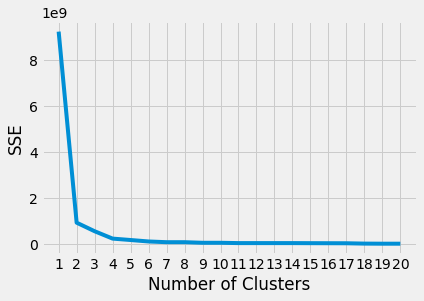

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 21), sse)
plt.xticks(range(1, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [32]:
kl = KneeLocator(
  range(1, 21), sse, curve="convex", direction="decreasing"
)
kl.elbow

2

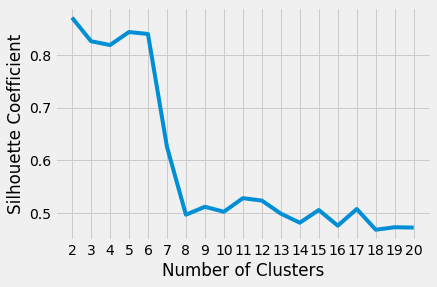

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 21), silhouette_coefficients)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()